In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

# plots in LaTeX-style
import tueplots
from tueplots import bundles
plt.rcParams.update(bundles.neurips2022())

# Data exploration

We start by loading the dataset, augmented manually by a column that is **True** if the relative food is plant based.\
Then, some exploration of the data follows (imputation of *Na*s, splitting the dataset, mean and variance calculation and some relevant plots).

In [3]:
# load data
data = pd.read_csv("../data/Food_Production.csv", sep=";")

In [4]:
data.head()

,Food product,Plant based,Land Use Change,Animal Feed,Farm,Processing,Transport,Packaging,Retail,Total Emissions,...,Freshwater Withdrawals per 100g Protein (liters per 100g Protein),Freshwater Withdrawals per kilogram (liters per kilogram),Greenhouse Gas Emissions per 1000kcal (kgCO2eq per 1000kcal),Greenhouse Gas Emissions per 100g Protein (kgCO2eq per 100g Protein),Land Use per 1000kcal (m2 per 1000kcal),Land Use per Kilogram (m2 per kilogram),Land Use per 100g Protein (m2 per 100g Protein),Scarcity weighted Water Use per Kilogram (liters per kilogram),Scarcity weighted Water Use per 100g protein (liters per 100g protein),Scarcity weighted Water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),True,0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),True,0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),True,0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,True,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,True,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


In [5]:
data.dtypes

Food product                                                                object
Plant based                                                                   bool
Land Use Change                                                            float64
Animal Feed                                                                float64
Farm                                                                       float64
Processing                                                                 float64
Transport                                                                  float64
Packaging                                                                  float64
Retail                                                                     float64
Total Emissions                                                            float64
Eutrophying Emissions per 1000kcal (gPO4eq per 1000kcal)                   float64
Eutrophying Emissions per Kilogram (gPO4eq per kilogram)                   float64
Eutr

In [6]:
# Imputation of the missing values via arithmetic mean
data = data.fillna(data.mean(numeric_only=True))

In [7]:
# Split the data between plant based and not, for further analysis 
data_plant = data[data["Plant based"] == True]
data_animal = data[data["Plant based"] == False]

In [8]:
# Calculate mean and variance of the two subsets
mean_plant = data_plant["Total Emissions"].mean()
mean_animal = data_animal["Total Emissions"].mean()
var_plant = data_plant["Total Emissions"].var()
var_animal = data_animal["Total Emissions"].var()
print("Plant based average emissions: " + str(round(mean_plant, 3)) + "\n" + 
      "Animal-based average emissions: " + str(round(mean_animal, 3)))
print("Plant-based emissions variance: " + str(round(var_plant, 3)) + "\n" + 
      "Animal-based emissions variance: " + str(round(var_animal, 3)))

Plant based average emissions: 2.319
Animal-based average emissions: 16.6
Plant-based emissions variance: 10.145
Animal-based emissions variance: 264.798


We can immediately see that plant based food seems to have an average emission of CO2 way smaller than the one from the animal derivatives data. Naturally, this does not make a sound evidence on its own, in fact we will run hypothesis testing later in order to establish the real meaning of the data.

## Plots

Here follow some plots regarding the data:

### Correlation Plot

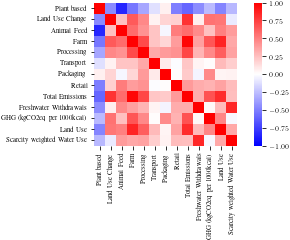

In [42]:
# for nice plots (svg) in LaTeX math mode:
with plt.rc_context(bundles.neurips2022(usetex=True, rel_width=1.0, nrows=1, ncols=1)):
    # Setup code
    fig, axs = plt.subplots(nrows=1, ncols=1)

    # Plotting code
    columns = ['Food product', 'Plant based', 'Land Use Change', 'Animal Feed', 'Farm',
       'Processing', 'Transport', 'Packaging', 'Retail', 'Total Emissions',
       'Freshwater Withdrawals per kilogram (liters per kilogram)',
       'Greenhouse Gas Emissions per 1000kcal (kgCO2eq per 1000kcal)',
       'Land Use per Kilogram (m2 per kilogram)',
       'Scarcity weighted Water Use per Kilogram (liters per kilogram)']
    labels = ['Food product', 'Plant based', 'Land Use Change', 'Animal Feed', 'Farm',
       'Processing', 'Transport', 'Packaging', 'Retail', 'Total Emissions',
       'Freshwater Withdrawals',
       'GHG (kgCO2eq per 1000kcal)',
       'Land Use',
       'Scarcity weighted Water Use']
    data_corr = data[columns]
    #data_corr = data_corr.set_axis(labels, axis=1).corr(numeric_only=True)
    data_corr = data_corr.set_axis(labels, axis=1).corr()
    corr_plot = sns.heatmap(data_corr, center=0.0, vmin=-1.0, vmax=1.0, cmap="bwr", ax=axs)
    axs.set_aspect("equal")

    # Save plot
    fig.savefig(
    "../doc/figures/heat-map.pdf",
    bbox_inches="tight",
    pad_inches=0.01,
    )

We can observe that the plant based indicator seems inversely correlated with all kinds of emissions, another small hint that plant based food may produce less emissions.

### Total emissions

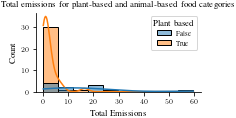

In [25]:
# for nice plots (svg) in LaTeX math mode:
with plt.rc_context(bundles.neurips2022(usetex=True, rel_width=0.5, nrows=1, ncols=1)):
    # Setup code
    fig, axs = plt.subplots(nrows=1, ncols=1)

    # Plotting code
    plant_hist = sns.histplot(x="Total Emissions", bins=10, legend=True, 
                              ax=axs, kde=True, hue="Plant based", data=data)
    plt.title("Total emissions for plant-based and animal-based food categories")
    axs.spines['top'].set_visible(False)
    axs.spines['right'].set_visible(False)
    # Save plot
    fig.savefig(
    "../doc/figures/emissions.pdf",
    bbox_inches="tight",
    pad_inches=0.01,
    )

**Observation**:
- plant based emissions look Chi-Squared distributed

**Problem**:
- most tests assume Gaussian distributed data.
So, let's transform data by applying *log* and check out the distribution

### Data (Total Emissions) Transformation: log()

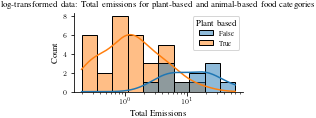

In [26]:
#### data Transformation:   log()
#  for nice plots (svg) in LaTeX math mode:
with plt.rc_context(bundles.neurips2022(usetex=True, rel_width=0.5, nrows=1, ncols=1)):
    # Setup code
    fig, axs = plt.subplots(nrows=1, ncols=1)

    # Plotting code
    plant_hist = sns.histplot(x="Total Emissions", bins=10, legend=True, 
                              ax=axs, kde=True, log_scale=True, data=data, hue="Plant based")
    plt.title("log-transformed data: Total emissions for plant-based and animal-based food categories")
    axs.spines['top'].set_visible(False)
    axs.spines['right'].set_visible(False)

    # Save plot
    fig.savefig(
    "../doc/figures/emissions-log.pdf",
    bbox_inches="tight",
    pad_inches=0.01,
    )

Now the data shows more recognizable Gaussian distributions.

### GHG emissions per 1000 kcal

We can draw the same plots for the above mentioned column:

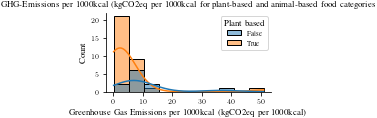

In [27]:
# original data
# for nice plots (svg) in LaTeX math mode:
with plt.rc_context(bundles.neurips2022(usetex=True, rel_width=0.5, nrows=1, ncols=1)):
    # Setup code
    fig, axs = plt.subplots(nrows=1, ncols=1)

    # Plotting code
    plant_hist = sns.histplot(x="Greenhouse Gas Emissions per 1000kcal (kgCO2eq per 1000kcal)", bins=10, legend=True, 
                              ax=axs, kde=True, log_scale=False, data=data, hue="Plant based")
    plt.title("GHG-Emissions per 1000kcal (kgCO2eq per 1000kcal for plant-based and animal-based food categories")
    axs.spines['top'].set_visible(False)
    axs.spines['right'].set_visible(False)
    #plt.legend(frameon=False)
    # Save plot
    fig.savefig(
    "../doc/figures/ghg.pdf", 
    bbox_inches="tight",
    pad_inches=0.01,
    )

### Data (GHG emissions per 1000 kcal) Transformation:   log()

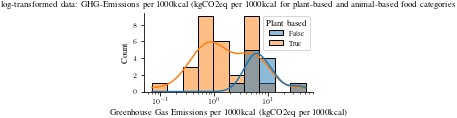

In [28]:
# for nice plots (pdf) in LaTeX math mode:
with plt.rc_context(bundles.neurips2022(usetex=True, rel_width=0.5, nrows=1, ncols=1)):
    # Setup code
    fig, axs = plt.subplots(nrows=1, ncols=1)

    # Plotting code
    plant_hist = sns.histplot(x="Greenhouse Gas Emissions per 1000kcal (kgCO2eq per 1000kcal)", bins=10, legend=True, 
                              ax=axs, kde=True, log_scale=True, data=data, hue="Plant based")
    plt.title("log-transformed data: GHG-Emissions per 1000kcal (kgCO2eq per 1000kcal for plant-based and animal-based food categories")

    axs.spines['top'].set_visible(False)
    axs.spines['right'].set_visible(False)
    # Save plot
    fig.savefig(
    "../doc/figures/ghg-log.pdf",
    bbox_inches="tight",
    pad_inches=0.01,
    )

### Observation: 
- Greenhouse Gas Emissions per 1000kcal (kgCO2eq per 1000kcal) feature, when log-transformed, looks even more Gaussian distributed than considering total emissions. We will use this in the next section to perform Hypothesis Testing.

# Data Analysis

## T-Test: Do animal-based and plant-based foods differ significantly in their emissions?

 We can use Unequal Variance T-Test due to the fact that the two distributions have different sample size and different variance. An implicit assumption of the test is to assume normal distributions. In the data-transformed case, this is reasonable to assume. (see https://www.investopedia.com/terms/t/t-test.asp#toc-which-t-test-to-use) \
 As mentioned in the previous section, we will use Greenhouse Gas Emissions per 1000kcal as the investigated feature, as it provides more recognizable Gaussian distributions in the case of the log-transformed data.

H_0: There is no difference regarding GHG between plant-based foods and animal-based food categories. 

H_1: There is a significant difference


In [11]:
# Turn data for "Greenhouse Gas Emissions per 1000kcal (kgCO2eq per 1000kcal" into array

plant_GHG_1000kcal_arr = (data_plant["Greenhouse Gas Emissions per 1000kcal (kgCO2eq per 1000kcal)"]).to_numpy()

animal_GHG_1000kcal_arr = (data_animal["Greenhouse Gas Emissions per 1000kcal (kgCO2eq per 1000kcal)"]).to_numpy()

In [12]:
# Perform t-test on log-transformed data
# Note that the "equal_var" flag is set to False, in order to select the right test

stats.ttest_ind(np.log10(animal_GHG_1000kcal_arr), np.log10(plant_GHG_1000kcal_arr), equal_var=False)

Ttest_indResult(statistic=5.032297801980174, pvalue=1.4093493720499051e-05)

The **t-statistic** of $5.03$ quantifies the difference between the arithmetic mean of the two samples.\
The p-value is very small with approx. **$p=0.0000140$** and quantifies the probability of observing similar of more extreme values assuming the Null-Hypothesis is true.\
Since this probability is very small with $p=0.0014\%$, **we can reject the Null-Hypothesis** and conclude that our data suggests that there is a significant difference in GHG-emissions regarding plant-based and animal based food.